In [1]:
import pandas as pd
import os
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im_df = pd.DataFrame()
im_df['image'] = ''
im_df['lable'] = ''

In [3]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad', 'surprise']

In [4]:
for i in emotions:
    for j in os.listdir('ck/CK+48/' + i):
        im_df= im_df.append({'image': j, 'lable': i},ignore_index=True)

In [5]:
im_df.head()

,image,lable
0,S010_004_00000017.png,angry
1,S010_004_00000018.png,angry
2,S010_004_00000019.png,angry
3,S011_004_00000019.png,angry
4,S011_004_00000020.png,angry


In [6]:
im_df = im_df.sample(frac=1)

In [7]:
im_df.head()

,image,lable
575,S132_006_00000023.png,happy
72,S092_003_00000012.png,angry
87,S113_008_00000021.png,angry
372,S501_004_00000054.png,fear
149,S035_005_00000019.png,disgust


In [8]:
im_df = im_df.reset_index()

In [9]:
im_df.head()

,index,image,lable
0,575,S132_006_00000023.png,happy
1,72,S092_003_00000012.png,angry
2,87,S113_008_00000021.png,angry
3,372,S501_004_00000054.png,fear
4,149,S035_005_00000019.png,disgust


In [10]:
img = imread('ck/CK+48/'+ im_df['lable'][1] + '/' + im_df['image'][1])
f, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

In [11]:
t_f = []
t_l = []
# t_f.append(f)
# t_f.append(f2)
# t_l.append(im_df['lable'][1])
# t_l.append('sad')

In [12]:
for i in range(0, len(im_df)):
    image = imread('ck/CK+48/'+ im_df['lable'][i] + '/' + im_df['image'][i])
    fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    t_f.append(fd)
    t_l.append(im_df['lable'][i])

In [13]:
len(t_f)

981

In [14]:
train_f = t_f[0:800]
train_l = t_l[0:800]
test_f = t_f[800:]
test_l = t_l[800:]

In [84]:
from sklearn import svm
svm_l = svm.SVC()

In [85]:
svm_l.fit(train_f, train_l)

SVC()

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'hog_svm2.sav'
# pickle.dump(svm_l, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
svm_l = pickle.load(open(filename, 'rb'))

In [16]:
# t_im_df = pd.DataFrame()
# t_im_df['image'] = ''
# t_im_df['lable'] = ''

In [17]:
# for i in emotions:
#     for j in os.listdir('images/validation/' + i):
#         t_im_df= t_im_df.append({'image': j, 'lable': i},ignore_index=True)

In [18]:
# test_x = []
# test_y = []
# # t_f.append(f)
# # t_f.append(f2)
# # t_l.append(im_df['lable'][1])
# # t_l.append('sad')

In [19]:
# for i in range(0, len(t_im_df)):
#     image = imread('images/'+'validation/'+ t_im_df['lable'][i] + '/' + t_im_df['image'][i])
#     fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
#     test_x.append(fd)
#     test_y.append(t_im_df['lable'][i])

In [20]:
from sklearn.metrics import classification_report

In [87]:
test_l

['surprise',
 'happy',
 'disgust',
 'angry',
 'happy',
 'angry',
 'happy',
 'angry',
 'disgust',
 'angry',
 'angry',
 'sad',
 'happy',
 'sad',
 'angry',
 'surprise',
 'surprise',
 'surprise',
 'happy',
 'sad',
 'sad',
 'sad',
 'fear',
 'surprise',
 'disgust',
 'sad',
 'angry',
 'disgust',
 'angry',
 'surprise',
 'happy',
 'disgust',
 'happy',
 'sad',
 'angry',
 'fear',
 'surprise',
 'surprise',
 'surprise',
 'happy',
 'disgust',
 'happy',
 'surprise',
 'disgust',
 'surprise',
 'disgust',
 'surprise',
 'happy',
 'angry',
 'angry',
 'fear',
 'disgust',
 'angry',
 'happy',
 'neutral',
 'neutral',
 'disgust',
 'sad',
 'happy',
 'happy',
 'happy',
 'surprise',
 'surprise',
 'sad',
 'sad',
 'surprise',
 'angry',
 'happy',
 'disgust',
 'sad',
 'angry',
 'happy',
 'disgust',
 'disgust',
 'disgust',
 'angry',
 'happy',
 'angry',
 'angry',
 'surprise',
 'happy',
 'angry',
 'happy',
 'sad',
 'sad',
 'fear',
 'happy',
 'sad',
 'happy',
 'fear',
 'disgust',
 'happy',
 'sad',
 'happy',
 'disgust',
 

In [111]:
ck_svm_pre = svm_l.predict(test_f)

In [112]:
svm_pre

array(['surprise', 'happy', 'surprise', ..., 'surprise', 'sad',
       'surprise'], dtype='<U8')

In [114]:
print(classification_report(ck_svm_pre, test_l))

              precision    recall  f1-score   support

       angry       1.00      0.93      0.96        28
     disgust       1.00      1.00      1.00        35
        fear       1.00      1.00      1.00         9
       happy       1.00      1.00      1.00        42
     neutral       0.91      1.00      0.95        10
         sad       0.90      1.00      0.95        19
    surprise       1.00      0.97      0.99        38

    accuracy                           0.98       181
   macro avg       0.97      0.99      0.98       181
weighted avg       0.98      0.98      0.98       181



In [183]:
ck_svm_pre_ls = []
for i in ck_svm_pre:
    ck_svm_pre_ls.append(i)

In [188]:
c_m_i = confusion_matrix(test_l, ck_svm_pre)

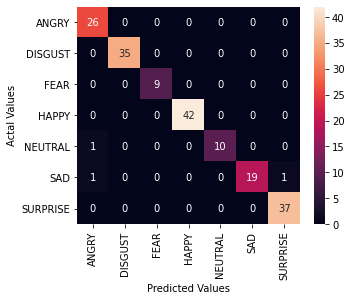

In [189]:
## Confusion Matirx                                                                                                        
cm_df = pd.DataFrame(c_m_i, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [129]:
ck_svm_pre[10]

'angry'

In [128]:
test_l[10]

'angry'

In [119]:
len(test_f[1])

900

In [120]:
# svm_l.predict(test_f[1].reshape(-1, 1))

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [19]:
KNN.fit(train_f, train_l)

KNeighborsClassifier(n_neighbors=4)

In [21]:
ck_sknn_pre = KNN.predict(test_f)

In [24]:
print(classification_report(ck_sknn_pre, test_l))

              precision    recall  f1-score   support

       angry       0.81      0.54      0.65        41
     disgust       0.70      0.61      0.65        38
        fear       0.85      0.58      0.69        19
       happy       0.66      0.83      0.73        35
     neutral       0.71      0.50      0.59        10
         sad       0.33      0.38      0.35         8
    surprise       0.62      1.00      0.77        30

    accuracy                           0.68       181
   macro avg       0.67      0.63      0.63       181
weighted avg       0.70      0.68      0.67       181



In [29]:
knn_report = classification_report(ck_sknn_pre, test_l, output_dict=True)

In [30]:
knn_clf = pd.DataFrame(knn_report).transpose()

In [32]:
knn_clf.to_csv('knn_clf.csv')

In [38]:
c_m_i_knn = confusion_matrix(test_l, ck_sknn_pre)

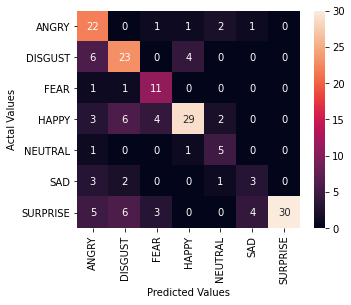

In [39]:
## Confusion Matirx                                                                                                        
cm_df_knn = pd.DataFrame(c_m_i_knn, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_knn, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# RF

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
RF = RandomForestClassifier(max_depth=25, random_state=0)

In [25]:
RF.fit(train_f, train_l)

RandomForestClassifier(max_depth=25, random_state=0)

In [26]:
ck_rf_pre = RF.predict(test_f)

In [28]:
print(classification_report(ck_rf_pre, test_l))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        27
     disgust       1.00      0.97      0.99        34
        fear       0.85      1.00      0.92        11
       happy       1.00      0.94      0.97        47
     neutral       0.71      1.00      0.83         5
         sad       1.00      1.00      1.00         9
    surprise       1.00      1.00      1.00        48

    accuracy                           0.98       181
   macro avg       0.94      0.99      0.96       181
weighted avg       0.98      0.98      0.98       181



In [33]:
rf_report = classification_report(ck_rf_pre, test_l, output_dict=True)

In [34]:
rf_clf = pd.DataFrame(rf_report).transpose()

In [35]:
rf_clf.to_csv('rf_clf.csv')

In [43]:
c_m_i_rf

array([[27,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0],
       [ 0,  1, 11,  1,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  2,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0, 48]], dtype=int64)

In [40]:
c_m_i_rf = confusion_matrix(test_l, ck_rf_pre)

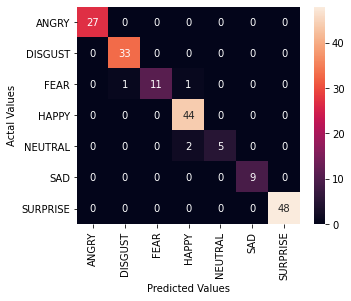

In [42]:
## Confusion Matirx                                                                                                        
cm_df_rf = pd.DataFrame(c_m_i_rf, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_rf, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Using model trained on CK+ to predict Fer 2013

In [99]:
emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [100]:
t_im_df = pd.DataFrame()
t_im_df['image'] = ''
t_im_df['lable'] = ''

In [101]:
for i in emotions:
    for j in os.listdir('test/' + i):
        t_im_df= t_im_df.append({'image': j, 'lable': i},ignore_index=True)

In [102]:
t_im_df.head()

,image,lable
0,PrivateTest_10131363.jpg,angry
1,PrivateTest_10304478.jpg,angry
2,PrivateTest_1054527.jpg,angry
3,PrivateTest_10590091.jpg,angry
4,PrivateTest_1109992.jpg,angry


In [103]:
t_im_df = t_im_df.sample(frac=1)

In [104]:
t_im_df = t_im_df.reset_index()

In [105]:
t_im_df.head()

,index,image,lable
0,6503,PrivateTest_41853394.jpg,surprise
1,2828,PrivateTest_85826121.jpg,happy
2,3353,PublicTest_48170323.jpg,happy
3,1123,PrivateTest_17591258.jpg,fear
4,1309,PrivateTest_48336881.jpg,fear


In [106]:
fer_test_x = []
fer_test_y = []
# t_f.append(f)
# t_f.append(f2)
# t_l.append(im_df['lable'][1])
# t_l.append('sad')

In [107]:
for i in range(0, len(t_im_df)):
    image = imread('test/'+ t_im_df['lable'][i] + '/' + t_im_df['image'][i])
    fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    fer_test_x.append(fd)
    fer_test_y.append(t_im_df['lable'][i])

In [216]:
len(fer_test_x[0])

900

In [108]:
svm_pre = svm_l.predict(fer_test_x)

In [110]:
print(classification_report(fer_test_y, svm_pre))

              precision    recall  f1-score   support

       angry       0.13      0.10      0.11       958
     disgust       0.04      0.42      0.08       111
        fear       0.19      0.08      0.12      1024
       happy       0.73      0.34      0.46      1774
     neutral       0.21      0.04      0.06      1233
         sad       0.25      0.08      0.12      1247
    surprise       0.19      0.81      0.31       831

    accuracy                           0.23      7178
   macro avg       0.25      0.27      0.18      7178
weighted avg       0.32      0.23      0.21      7178



# Using trained model on testing video dataset

In [133]:
import cv2
from cv2.data import haarcascades
import pandas as pd

In [134]:
def mode(ls):
    # dictionary to keep count of each value
    counts = {}
    # iterate through the list
    for item in ls:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    # get the keys with the max counts
    return [key for key in counts.keys() if counts[key] == max(counts.values())]


In [155]:
facec = cv2.CascadeClassifier(R'C:\Users\Danyal\AppData\Local\Programs\Python\Python39\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
video_n = []
emo = []
def video_here(v_name):
    # model = svm_l()
    data = pd.DataFrame()
    data['frame_no.'] = ''
    data['Time_Stamp'] = ''
    data['Emotion_Predicted'] = ''
    
    v_name = v_name
    Emotion_Predicted = []
    

    font = cv2.FONT_HERSHEY_SIMPLEX
#     print('videos/'+v_name)
    cap = cv2.VideoCapture(R'C:\Users\Danyal\Desktop\DCU\practicum/videos/'+v_name)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame_size = (frame_width,frame_height)
    fps = 20
    frame_no =1

    output = cv2.VideoWriter(f'Video_ch', cv2.VideoWriter_fourcc(*'XVID'), 20, frame_size)
    while(cap.isOpened()):
        # vid_capture.read() methods returns a tuple, first element is a bool
        # and the second is frame


        ret, frame = cap.read()
        if ret == True:
            gray_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = facec.detectMultiScale(gray_fr, 1.3, 5)
            for (x, y, w, h) in faces:
                fc = gray_fr[y:y+h, x:x+w]
                roi = cv2.resize(fc, (48, 48))
                fea,im1 = hog(roi, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True, multichannel=False)
                pred = svm_l.predict(fea.reshape(1, -1))
                Emotion_Predicted.append(pred[0])
#                 print(pred)
    #             cv2.putText(frame, pred, (x, y), font, 1, (255, 0, 0), 2)
                cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),4) 


        # Write the frame to the output files
            output.write(frame)

        #Writing the frame and its identified emotion
#             Emotion_Predicted.append(pred)
#             data = data.append({'Frame_No.':frame_no,'Time_Stamp':cap.get(cv2.CAP_PROP_POS_MSEC),'Emotion_Predicted':pred},ignore_index= True)

        else:
    #             print("Stream disconnected")
            break
        frame_no += 1
#     print(Emotion_Predicted)
    mod_emo = mode(Emotion_Predicted)
    video_n.append(v_name)
    emo.append(mod_emo[0])
    cap.release()
    output.release()


In [156]:
for i in range(0,106):
    if i == 10:
        continue
    video_here('Video ' + str(i) + '.mp4')


In [154]:
emo

['fear', 'disgust', 'surprise']

In [157]:
svm_hog_out = pd.DataFrame()

In [158]:
svm_hog_out['emotion'] = emo
svm_hog_out['Video_name'] = video_n

In [159]:
svm_hog_out.head()

,emotion,Video_name
0,fear,Video 0.mp4
1,disgust,Video 1.mp4
2,surprise,Video 2.mp4
3,sad,Video 3.mp4
4,happy,Video 4.mp4


In [160]:
svm_hog_out.to_csv('hog_svm_out2.csv', index=False)

In [161]:
svm_hog_out.head()

,emotion,Video_name
0,fear,Video 0.mp4
1,disgust,Video 1.mp4
2,surprise,Video 2.mp4
3,sad,Video 3.mp4
4,happy,Video 4.mp4


In [162]:
gt = pd.read_csv('GroundTruthEmotions.csv')

In [168]:
for i in range(0, len(gt)):
    gt['Emotion_Identified'][i] =  gt['Emotion_Identified'][i].lower()

In [169]:
print(classification_report(gt['Emotion_Identified'],svm_hog_out['emotion']))

              precision    recall  f1-score   support

       angry       0.29      0.10      0.15        20
     disgust       0.06      0.14      0.08         7
        fear       0.27      0.60      0.37         5
       happy       0.82      0.35      0.49        26
     neutral       0.00      0.00      0.00        23
         sad       0.43      0.19      0.26        16
    surprise       0.08      0.50      0.13         8

    accuracy                           0.21       105
   macro avg       0.28      0.27      0.21       105
weighted avg       0.35      0.21      0.22       105



C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [186]:
cm = confusion_matrix(gt['Emotion_Identified'],svm_hog_out['emotion'])

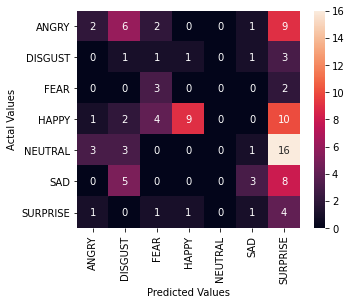

In [187]:
## Confusion Matirx                                                                                                        
cm_df = pd.DataFrame(cm, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Testing on JAFEE database (Using the trained model)

In [237]:
j_im_df = pd.DataFrame()
j_im_df['image'] = ''
j_im_df['lable'] = ''

In [238]:
for i in emotions:
    for j in os.listdir('jaffedbase/' + i):
        j_im_df= j_im_df.append({'image': j, 'lable': i},ignore_index=True)

In [239]:
j_im_df = j_im_df.sample(frac=1)

In [240]:
j_im_df = j_im_df.reset_index()

In [241]:
j_im_df.head()

,index,image,lable
0,218,YM.SU2.59.tiff,surprise
1,186,YM.SA1.55.tiff,sad
2,112,NA.HA2.203.tiff,happy
3,164,KM.SA1.9.tiff,sad
4,19,NM.AN1.104.tiff,angry


In [269]:
img = imread('jaffedbase/'+ j_im_df['lable'][1] + '/' + j_im_df['image'][1])
# img = resize(img, (48, 48))
f, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

34596

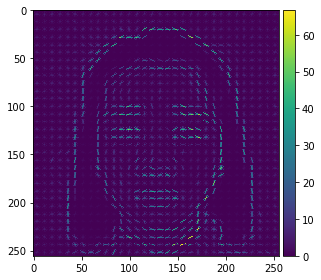

In [271]:
imshow(hog_image)
# imshow(img)

In [262]:
j_t_f = []
j_t_l = []
# t_f.append(f)
# t_f.append(f2)
# t_l.append(im_df['lable'][1])
# t_l.append('sad')

In [253]:
print(j_im_df['image'][53])

NA.DI1.214.tiff


In [254]:
len(j_im_df)

220

In [255]:
for i in range(0, len(j_im_df)):
    try:
        image = imread('jaffedbase/'+ j_im_df['lable'][i] + '/' + j_im_df['image'][i])
        image = resize(image, (48,48))
        fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        j_t_f.append(fd)
        j_t_l.append(j_im_df['lable'][i])
    except:
        continue

In [256]:
len(j_t_f[0])

900

In [257]:
j_pre = svm_l.predict(j_t_f)

In [258]:
print(classification_report(j_t_l,j_pre))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        30
     disgust       0.00      0.00      0.00        29
        fear       0.50      0.03      0.06        32
       happy       0.00      0.00      0.00        31
     neutral       0.00      0.00      0.00        30
         sad       0.00      0.00      0.00        31
    surprise       0.14      1.00      0.25        30

    accuracy                           0.15       213
   macro avg       0.09      0.15      0.04       213
weighted avg       0.10      0.15      0.04       213



C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [229]:
cmj = confusion_matrix(j_t_l,j_pre)

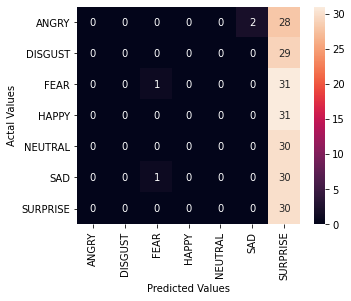

In [230]:
## Confusion Matirx                                                                                                        
cm_df_j = pd.DataFrame(cmj, index = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'], columns = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']) 
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_j, annot=True)
plt.title('')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [263]:
for i in range(0, len(j_im_df)):
    try:
        image = imread('jaffedbase/'+ j_im_df['lable'][i] + '/' + j_im_df['image'][i])
#         image = resize(image, (48,48))
        fd,img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        j_t_f.append(fd)
        j_t_l.append(j_im_df['lable'][i])
    except:
        continue

# Training on JAFEE

In [264]:
train_f_j = j_t_f[0:160]
train_l_j = j_t_l[0:160]
test_f_j = j_t_f[160:]
test_l_j = j_t_l[160:]

In [265]:
from sklearn import svm
svm_j = svm.SVC()

In [266]:
svm_j.fit(train_f_j,train_l_j)

SVC()

In [267]:
jafee_pre = svm_j.predict(test_f_j)

In [268]:
print(classification_report(test_l_j, jafee_pre))

              precision    recall  f1-score   support

       angry       0.20      0.33      0.25         6
     disgust       1.00      0.43      0.60         7
        fear       0.75      0.25      0.38        12
       happy       0.67      0.25      0.36         8
     neutral       0.00      0.00      0.00        10
         sad       0.11      0.29      0.16         7
    surprise       0.20      1.00      0.33         3

    accuracy                           0.28        53
   macro avg       0.42      0.36      0.30        53
weighted avg       0.45      0.28      0.29        53



C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danyal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
